# Evaluating the Saved Bird Species Prediction Model
This code accompanies [my blog post on this topic](https://daehnhardt.com/blog/2022/05/02/tf-reusing-and-evaluating-saved-models).

In [1]:
# Getting helper functions
!wget https://raw.githubusercontent.com/edaehn/deep_learning_notebooks/main/helpers.py

--2022-05-03 12:19:25--  https://raw.githubusercontent.com/edaehn/deep_learning_notebooks/main/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34518 (34K) [text/plain]
Saving to: ‘helpers.py’

helpers.py          100%[===================>]  33.71K  --.-KB/s    in 0.002s  

2022-05-03 12:19:25 (13.5 MB/s) - ‘helpers.py’ saved [34518/34518]



In [2]:
# Setup to download Kaggle datasets into a Colab instance
# You need to have your own kaggle.json file uploaded beforehand
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download gpiosenka/100-bird-species/birds -p /content/sample_data/birds --unzip

100% 1.49G/1.49G [00:07<00:00, 252MB/s]
100% 1.49G/1.49G [00:07<00:00, 210MB/s]


In [4]:
# Getting saved fine-tuned EffecientNetB0 model
!wget https://github.com/edaehn/deep_learning_notebooks/raw/main/models/model_4_bird_species_prediction.zip

--2022-05-03 12:20:03--  https://github.com/edaehn/deep_learning_notebooks/raw/main/models/model_4_bird_species_prediction.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/edaehn/deep_learning_notebooks/main/models/model_4_bird_species_prediction.zip [following]
--2022-05-03 12:20:04--  https://raw.githubusercontent.com/edaehn/deep_learning_notebooks/main/models/model_4_bird_species_prediction.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27951483 (27M) [application/zip]
Saving to: ‘model_4_bird_species_prediction.zip’

model_4_bird_specie 100%[===================>]  26.66M   152MB/s   

## Using Helper Functions
I have shared my [helpers.py](https://github.com/edaehn/deep_learning_notebooks/blob/main/helpers.py) file containing few useful functions for data preprocessing, model creation and evaluation. You can use this file as you like, change it and share with me your ideas :)

In [5]:
# Import files library from google.colab
from google.colab import files

# Import all functions from the helpers.py
from helpers import *

In [6]:
# Unzipping saved model
unzip_file("/content/model_4_bird_species_prediction.zip")

True

# Checking that the Dataset is Loaded Correctly

In [7]:
# Define the directory wherein the dataset is stored
dataset_path = "sample_data/birds"

# Show file numbers in the directory "sample_data/birds"
walk_directory(dataset_path)

There are 4 directories and '5'' files in sample_data/birds.
There are 400 directories and '0'' files in sample_data/birds/train.
There are 0 directories and '194'' files in sample_data/birds/train/RAZORBILL.
There are 0 directories and '129'' files in sample_data/birds/train/BRANDT CORMARANT.
There are 0 directories and '144'' files in sample_data/birds/train/WILD TURKEY.
There are 0 directories and '197'' files in sample_data/birds/train/MARABOU STORK.
There are 0 directories and '175'' files in sample_data/birds/train/GLOSSY IBIS.
There are 0 directories and '126'' files in sample_data/birds/train/WILSONS BIRD OF PARADISE.
There are 0 directories and '149'' files in sample_data/birds/train/BLACK SWAN.
There are 0 directories and '120'' files in sample_data/birds/train/GRAY PARTRIDGE.
There are 0 directories and '175'' files in sample_data/birds/train/SHOEBILL.
There are 0 directories and '120'' files in sample_data/birds/train/CHIPPING SPARROW.
There are 0 directories and '155'' fil

sample_data/birds/train/FAIRY TERN
['116.jpg']
Image shape: (224, 224, 3)
sample_data/birds/train/EUROPEAN GOLDFINCH
['079.jpg']
Image shape: (224, 224, 3)
sample_data/birds/train/TRUMPTER SWAN
['090.jpg']
Image shape: (224, 224, 3)
sample_data/birds/train/SATYR TRAGOPAN
['137.jpg']
Image shape: (224, 224, 3)
sample_data/birds/train/RAINBOW LORIKEET
['050.jpg']
Image shape: (224, 224, 3)


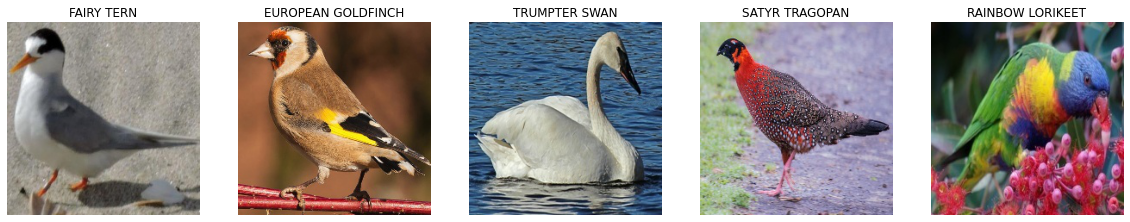

In [8]:
show_five_birds(dataset_path=dataset_path)

## Getting Training and Test Data

In [9]:
# Getting training and test datasets
train_data, test_data = get_image_data(dataset_path=dataset_path, IMG_SIZE = (224, 224))


Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


# Loading and Evaluating the Trained Model

In [10]:
# Load unzipped model
loaded_model = tf.keras.models.load_model("model_4")

In [11]:
# Evaluate on the full test dataset
loaded_model.evaluate(test_data)

63/63 [==============================] - 24s 183ms/step - loss: 0.0537 - accuracy: 0.9845


[0.05371851101517677, 0.984499990940094]

# The Wrongest Bird Predictions

Found 2000 files belonging to 400 classes.
63/63 [==============================] - 12s 160ms/step
Wrongly predicted 31 out of 2000


/content/helpers.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots(1, 2);


0.9845

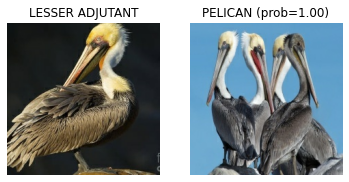

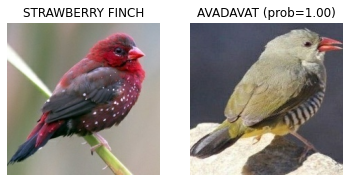

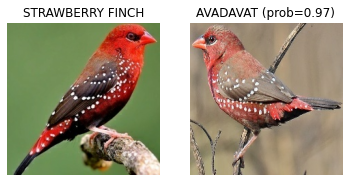

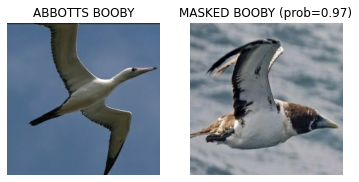

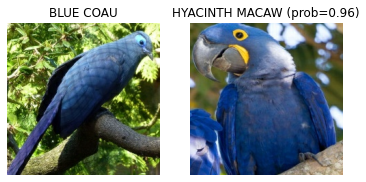

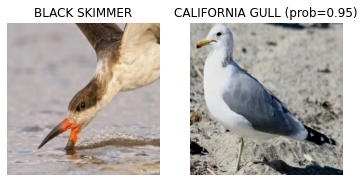

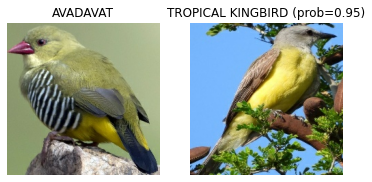

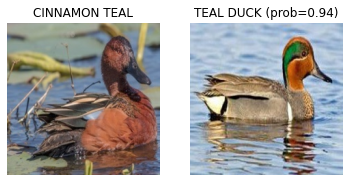

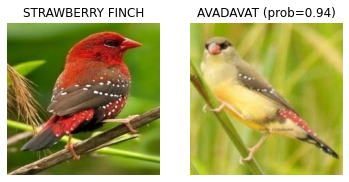

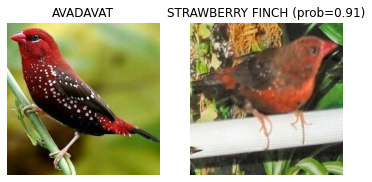

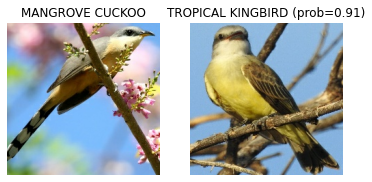

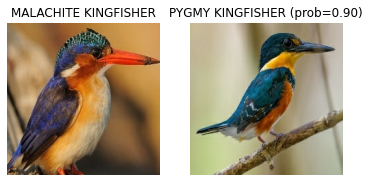

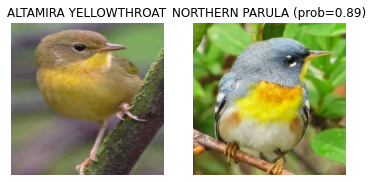

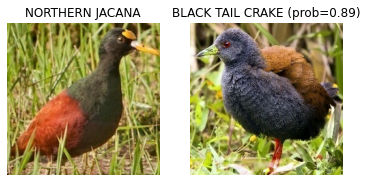

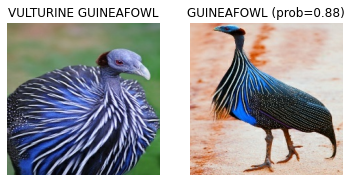

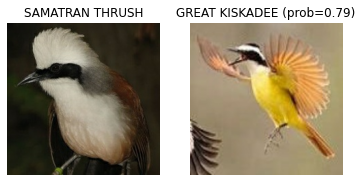

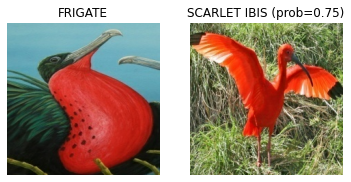

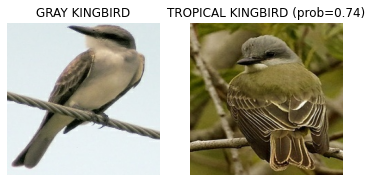

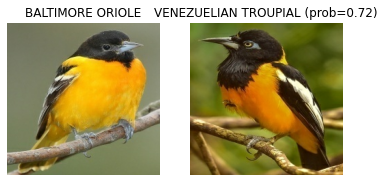

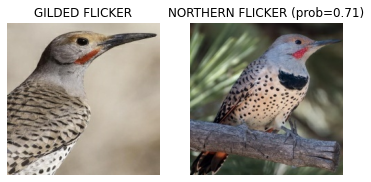

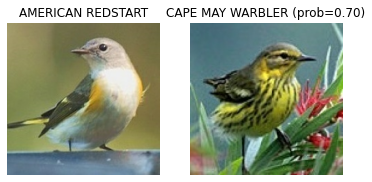

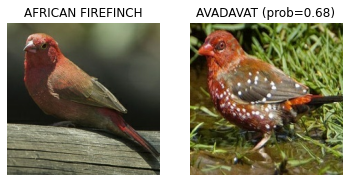

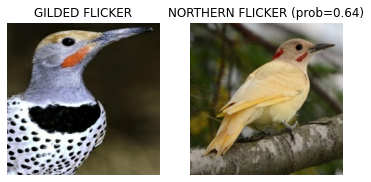

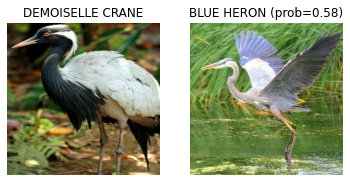

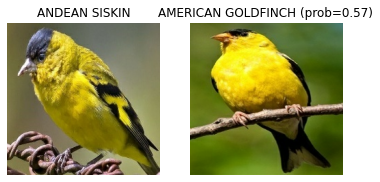

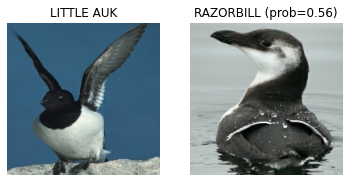

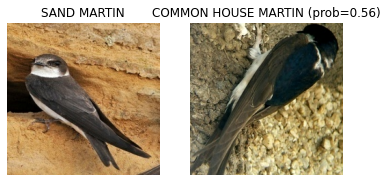

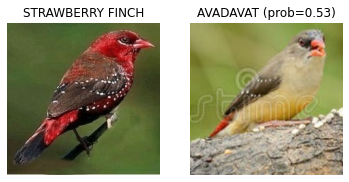

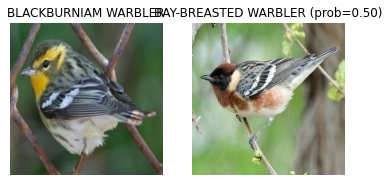

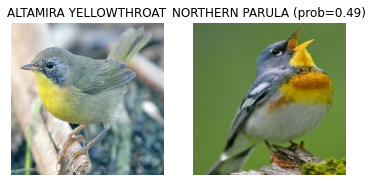

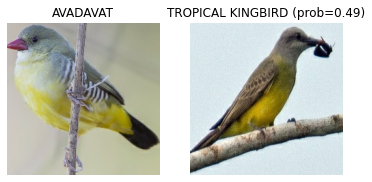

In [12]:
# Show top wrongly predicted birds
show_wrongly_predicted_images(loaded_model)

# Predicting a Bird Downloaded from Web
http://planetbirds.blogspot.com/2012/01/red-avadavat.html

In [13]:
!wget http://2.bp.blogspot.com/-EB4avRIsLQ8/Tv25pjMDi3I/AAAAAAAAB9s/Io8ybYRjjFM/s1600/Red+avadavat+Amandava+amandava.jpg


--2022-05-03 12:21:25--  http://2.bp.blogspot.com/-EB4avRIsLQ8/Tv25pjMDi3I/AAAAAAAAB9s/Io8ybYRjjFM/s1600/Red+avadavat+Amandava+amandava.jpg
Resolving 2.bp.blogspot.com (2.bp.blogspot.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connecting to 2.bp.blogspot.com (2.bp.blogspot.com)|74.125.124.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98904 (97K) [image/jpeg]
Saving to: ‘Red+avadavat+Amandava+amandava.jpg’

Red+avadavat+Amanda 100%[===================>]  96.59K  --.-KB/s    in 0s      

2022-05-03 12:21:25 (195 MB/s) - ‘Red+avadavat+Amandava+amandava.jpg’ saved [98904/98904]



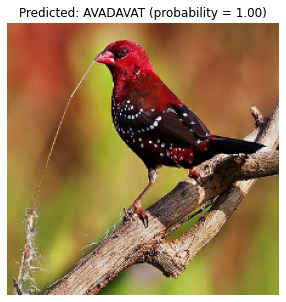

In [14]:
filename="/content/Red+avadavat+Amandava+amandava.jpg"
predict_and_plot(loaded_model, filename, train_data.class_names, \
                 known_label=False, rescale=False)